##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install numpy
# %pip install scikit-learn
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# DO NOT DELETE (UNCOMMENT THIS SECTION FOR SUBMISSION)
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catA_train.csv"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# Data Exploration

## Importing data from csv file
First, we get the shape of the data and preview the top few rows.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv(filepath)
print("No. of rows: {}\nNo. of cols: {}".format(*df.shape))
df.head()

No. of rows: 29182
No. of cols: 28


,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


##Initial analysis
From the overview, there are a few initial conclusions we can draw about the usability of some categories. Particularly, our team is looking for notable patterns or data-lacking columns. We first counted the number of missing values in each column. Following, we looked at the number of unique values in each column.

In [4]:
df.isna().sum().sort_values(ascending=False)

Square Footage                         29182
Import/Export Status                   22569
Fiscal Year End                        22445
Employees (Single Site)                12403
Employees (Global Ultimate Total)       2774
Domestic Ultimate Company               1035
Global Ultimate Country                  523
Parent Country                           520
Global Ultimate Company                  514
Parent Company                           514
Year Found                               434
LONGITUDE                                120
LATITUDE                                 120
Employees (Domestic Ultimate Total)       79
Company Description                        0
Ownership Type                             0
Company Status (Active/Inactive)           0
Entity Type                                0
8-Digit SIC Description                    0
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
8-Digit SIC Code                           0
Industry  

In [5]:
df.nunique().sort_values()

Square Footage                             0
Company Status (Active/Inactive)           1
Is Global Ultimate                         2
Is Domestic Ultimate                       2
Import/Export Status                       3
Entity Type                                4
Ownership Type                             6
Parent Country                            69
Global Ultimate Country                   74
Year Found                               106
Fiscal Year End                          115
Employees (Single Site)                  227
Employees (Domestic Ultimate Total)      380
Industry                                 580
SIC Code                                 582
Employees (Global Ultimate Total)       2013
8-Digit SIC Description                 2191
8-Digit SIC Code                        2255
Sales (Global Ultimate Total USD)       7574
Sales (Domestic Ultimate Total USD)     8346
LATITUDE                                9305
LONGITUDE                               9307
Global Ult

## Dropping columns


We discover that the columns `Square Footage`, `Employees (Single Site)`, `Import/Export Status`, and `Fiscal Year End` possess a substantial numbers of missing values. This can prove problematic in the calculation of analysis values as well as predictions, leading to lower than expected values. In the interest of accuracy over encompassing more values and categories, we chose to drop these columns.

Moreover, the column `Company Status (Active/Inactive)` has only one unique value.

`AccountID` and `Company` are simply unique identifiers for each company and thus irrelevant for analysis.

`Company Description` and `8-Digit SIC Description` are long strings that are too prohibitively complex to process and extract information from.

`LATITUDE` and `LONGITUDE` have been dropped in the interest of reducing feature complexity of our subsequent models.

In [6]:
df = df.drop(columns=['Square Footage',
                      'Employees (Single Site)',
                      'Import/Export Status',
                      'Fiscal Year End',
                      'Company Status (Active/Inactive)',
                      'AccountID',
                      'Company',
                      'Company Description',
                      '8-Digit SIC Description',
                      'LATITUDE',
                      'LONGITUDE'])

In order to identify trends and patterns of significance, the use of statistical correlations gave us a good sense of interesting patterns. Below is a correlation matrix, which allow us to scope out interesting relationships previously unnoticeable from the orginal data.

In [7]:
print(df.corr())

                                     SIC Code  8-Digit SIC Code  Year Found  \
SIC Code                             1.000000          0.999772    0.195683   
8-Digit SIC Code                     0.999772          1.000000    0.195632   
Year Found                           0.195683          0.195632    1.000000   
Employees (Domestic Ultimate Total) -0.022058         -0.022178   -0.046540   
Employees (Global Ultimate Total)    0.001587          0.001607   -0.025981   
Sales (Domestic Ultimate Total USD) -0.011493         -0.011480    0.014523   
Sales (Global Ultimate Total USD)   -0.014743         -0.014717   -0.021591   
Is Domestic Ultimate                 0.016096          0.015921    0.076785   
Is Global Ultimate                   0.087371          0.087409    0.111644   

                                     Employees (Domestic Ultimate Total)  \
SIC Code                                                       -0.022058   
8-Digit SIC Code                                         

Now let's visualise this with a heatmap

<AxesSubplot:>

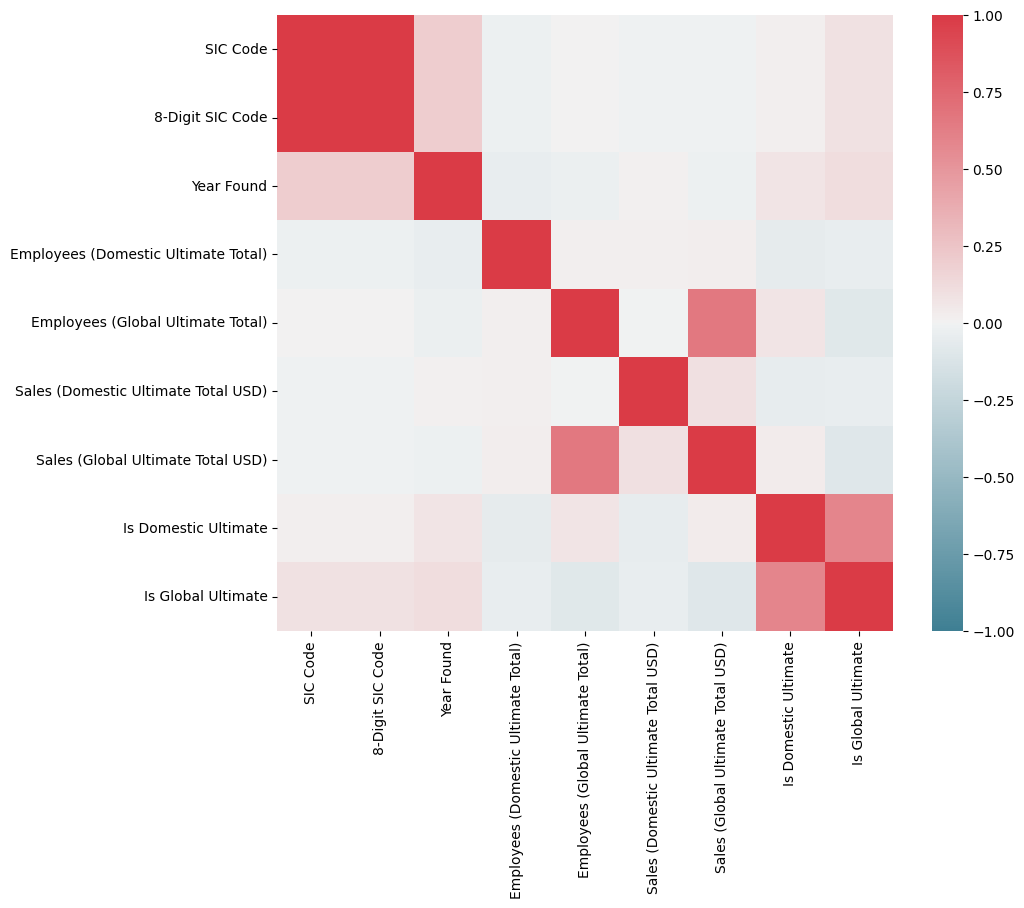

In [8]:
pd.set_option('display.expand_frame_repr', False)

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

From the correlation matrix and heatmap visualization, we ackowledged the strong correlations between `Employees (Domestic Ultimate Total)` , `Employees (Global Ultimate Total)` and `Sales (Domestic Ultimate Total USD)'` , `'Sales (Global Ultimate Total USD)`

## Feature Engineering
To generate more specific and valuable trends and relationships, we have created `same_ultimate_company`.

Since the given `sector` column has too many unique categories and will lead to high-dimensionality, we decide to use 'SIC Code' to create our own 'sector' feature with less categories. We referred to the SIC standard to decide on the categorisations.

We obtained SIC code categorisations from this webpage : https://www.ehso.com/siccodes.php

This may allow us to gather a clearer and stronger relationship between the different factors and global sales.


In [9]:
df["same_ultimate_company"] = df["Global Ultimate Company"] == df["Domestic Ultimate Company"]

In [10]:
df['sector'] = df['SIC Code'].apply(lambda x:
    'Agriculture, Forestry and Fishing' if x < 1000 else
    'Mining' if x < 1500 else
    'Construction' if x < 1800 else
    'not used' if x < 2000 else
    'Manufacturing' if x < 4000 else
    'Transportation, Communications, Electric, Gas and Sanitary service' if x < 5000 else
    'Wholesale Trade' if x < 5200 else
    'Retail Trade' if x < 6000 else
    'Finance, Insurance and Real Estate' if x < 6800 else
    'Services' if x < 9000 else
    'Public Administration' if x <= 9729 else
    'Nonclassifiable'
)

Next, we create more columns `par_country_sg` and `glob_country_sg` to hold the boolean result of asking if "Parent Country is Singapore" and "Global Ultimate Country is Singapore" respectively.



In [11]:
df['par_country_sg'] = df['Parent Country'] == 'Singapore'
df['glob_country_sg'] = df['Global Ultimate Country'] == 'Singapore'


In [12]:
df['same_employees'] = df['Employees (Domestic Ultimate Total)'] == df['Employees (Global Ultimate Total)']
df['same_sales'] = df['Sales (Domestic Ultimate Total USD)'] == df['Sales (Global Ultimate Total USD)']

Having converted the SIC codes into binary features describing the sectors of the company, `SIC code`,`Industry`, and `8-Digit SIC Code` can now be dropped.

The remaining categorical columns which include (`Parent Company`,
                      `Parent Country,`
                      `Global Ultimate Company`,
                      `Global Ultimate Country`,
                      `Domestic Ultimate Company`) have been feature-engineered into other binary columns previously, allowing us to drop them. Now we have just columns of integer inputs suitable for machine learning models.

In [13]:
df = df.drop(columns=['SIC Code',
                      'Industry',
                      '8-Digit SIC Code',
                      'Parent Company',
                      'Parent Country',
                      'Global Ultimate Company',
                      'Global Ultimate Country',
                      'Domestic Ultimate Company'])

## Data cleaning
Now we have to handle missing values in the columns that we have kept.

In [14]:
print(df.isna().sum().sort_values(ascending=False))

Employees (Global Ultimate Total)      2774
Year Found                              434
Employees (Domestic Ultimate Total)      79
Entity Type                               0
Ownership Type                            0
Sales (Domestic Ultimate Total USD)       0
Sales (Global Ultimate Total USD)         0
Is Domestic Ultimate                      0
Is Global Ultimate                        0
same_ultimate_company                     0
sector                                    0
par_country_sg                            0
glob_country_sg                           0
same_employees                            0
same_sales                                0
dtype: int64


In [15]:
from sklearn.impute import SimpleImputer

df_num = df[["Year Found", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
            "Sales (Global Ultimate Total USD)"]]
df_cat = df[["Entity Type", "Ownership Type", "sector"]]
IMP_NUM = SimpleImputer(strategy="median")
IMP_CAT = SimpleImputer(strategy="most_frequent")
df.loc[:,df_num.columns] = IMP_NUM.fit_transform(df_num)
df.loc[:,df_cat.columns] = IMP_CAT.fit_transform(df_cat)

In [16]:
print(df.isna().sum().sort_values(ascending=False))

Year Found                             0
Entity Type                            0
Ownership Type                         0
Employees (Domestic Ultimate Total)    0
Employees (Global Ultimate Total)      0
Sales (Domestic Ultimate Total USD)    0
Sales (Global Ultimate Total USD)      0
Is Domestic Ultimate                   0
Is Global Ultimate                     0
same_ultimate_company                  0
sector                                 0
par_country_sg                         0
glob_country_sg                        0
same_employees                         0
same_sales                             0
dtype: int64


### Encoding Categorical Features

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year Found                           29182 non-null  float64
 1   Entity Type                          29182 non-null  object 
 2   Ownership Type                       29182 non-null  object 
 3   Employees (Domestic Ultimate Total)  29182 non-null  float64
 4   Employees (Global Ultimate Total)    29182 non-null  float64
 5   Sales (Domestic Ultimate Total USD)  29182 non-null  float64
 6   Sales (Global Ultimate Total USD)    29182 non-null  float64
 7   Is Domestic Ultimate                 29182 non-null  float64
 8   Is Global Ultimate                   29182 non-null  float64
 9   same_ultimate_company                29182 non-null  bool   
 10  sector                               29182 non-null  object 
 11  par_country_sg              

Since we still have columns which are categorical, all we need to do is apply one-hot encoding to convert the categories into integer features which are suitable for machine learning models.

In [18]:
df = pd.get_dummies(df, columns=["sector", "Entity Type", "Ownership Type"], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 29 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Year Found                                                                 29182 non-null  float64
 1   Employees (Domestic Ultimate Total)                                        29182 non-null  float64
 2   Employees (Global Ultimate Total)                                          29182 non-null  float64
 3   Sales (Domestic Ultimate Total USD)                                        29182 non-null  float64
 4   Sales (Global Ultimate Total USD)                                          29182 non-null  float64
 5   Is Domestic Ultimate                                                       29182 non-null  float64
 6   Is Global Ultimate                                    

## An important discovery

From the correlation matrix above, we observed that among the variables against `Sales (Domestic Ultimate Total USD)`, `Sales (Global Ultimate Total USD)` has the highest correlation.

Further inspection of the rows reveal that **many of the rows have** in fact **equal values** of these 2 features. Given the nature of international and domestic income streams, this clue incentivised us to investigate the exact relationship between these features.



In [19]:
df_same_sales = df[df["Sales (Domestic Ultimate Total USD)"] == df["Sales (Global Ultimate Total USD)"]]
print("{} out of {} rows have equal Domestic Ultimate and Global Ultimate sales.".format(df_same_sales.shape[0], df.shape[0]))

19613 out of 29182 rows have equal Domestic Ultimate and Global Ultimate sales.


Out of these rows, we also realise that a substantial amount has the same `Global Ultimate Company` and `Domestic Ultimate Company` entries.

In [20]:
print("{} out of {} rows with same sales have the same Global Ultimate and Domestic Ultimate company.".format(df.same_ultimate_company.sum(), df_same_sales.shape[0]))

18566 out of 19613 rows with same sales have the same Global Ultimate and Domestic Ultimate company.


Digging deeper, we realise that a few other features can also help predict whether a company is of the type to have equal domestic and global sales.

In [21]:
both_true_count = (df['same_sales'] & df['par_country_sg']).sum()
print("{} out of {} rows with same sales have parent countries listed as Singapore".format(both_true_count, df.same_sales.sum()))
print('-'*80)

both_true_count = (df['same_sales'] & df['glob_country_sg']).sum()
print("{} out of {} rows with same sales have global ultimate countries listed as Singapore".format(both_true_count, df.same_sales.sum()))
print('-'*80)

both_true_count = (df['same_sales'] & df['same_employees']).sum()
print("{} out of {} rows with same sales have same domestic and global employee numbers".format(both_true_count, df.same_sales.sum()))
print('-'*80)


19136 out of 19613 rows with same sales have parent countries listed as Singapore
--------------------------------------------------------------------------------
19172 out of 19613 rows with same sales have global ultimate countries listed as Singapore
--------------------------------------------------------------------------------
19554 out of 19613 rows with same sales have same domestic and global employee numbers
--------------------------------------------------------------------------------


Let's lay this out onto a heatmap again

                                     Year Found  Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  Is Domestic Ultimate  Is Global Ultimate  same_ultimate_company  par_country_sg  glob_country_sg  same_employees  same_sales
Year Found                             1.000000                            -0.045881                          -0.024488                             0.014334                          -0.021866              0.074757            0.110308               0.012058        0.003742         0.009385        0.024548    0.024706
Employees (Domestic Ultimate Total)   -0.045881                             1.000000                           0.019815                             0.016905                           0.024370             -0.060379           -0.044232               0.001020        0.018779         0.002363        0.004957    0.004824
Employees (Global Ultimate Total)     -0.02448

<AxesSubplot:>

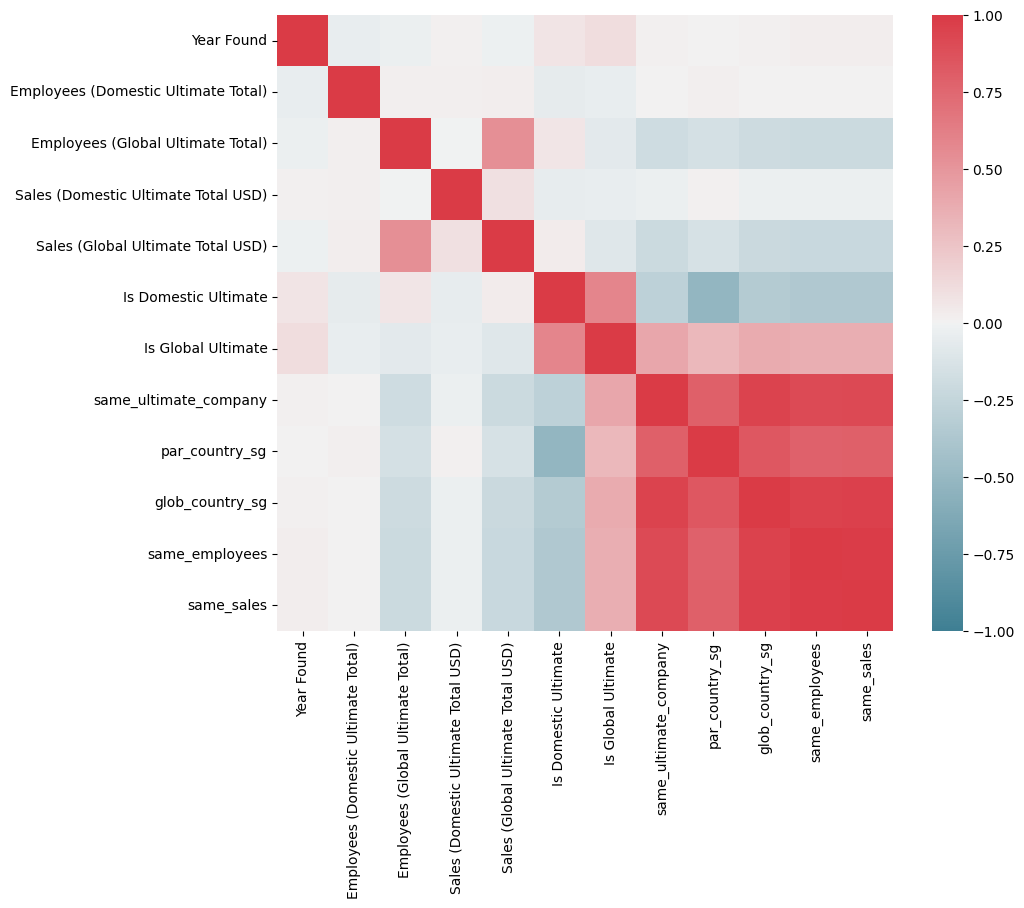

In [22]:
pd.set_option('display.expand_frame_repr', False)

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
first_10 = corr.columns[:12]
corr = corr.loc[first_10, first_10]
print(corr)

sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

We contemplated whether all of these patterns are linked to the header definitions provided by the dataset source, shown here:


---


**Sales (Domestic Ultimate Total)** - Total sales for all entities that report to the highest ranking member of a Corporate Family Tree within the same country/region within a limb of a Corporate Family. This represents the sales of the global ultimate entity itself, which in some cases may be a group consolidated figure.

**Sales (Global Ultimate Total)** – Total Sales of the Global Ultimate Company. This represents the sales of the global ultimate entity itself, which in some cases may be a group consolidated figure


---


This made us realise that the reason why companies whose global ultimate company are also their domestic ultimate company almost always (94.6% of the time) reports their global sales as their domestic sales, could be due to the fact that these companies have their top-level headquarters situated in Singapore. This means that they are possibly required to declare their global sales as their domestic sales as well. We theorise that this is due to these companies being subject to the financial jurisdiction of Singapore.

These findings were compelling, and since we discovered that there is a category of companies that will report their global sales as domestic sales, we can attempt to predict whether companies we are testing in the future will fall under this category. If they do, we will be able to predict their domestic sales with almost absolute certainty.

### Further rationalisation
Singapore is also a highly globalised country with an export-oriented economy. The influence of exports on our economy is so strong that the Singapore dollar has to be pegged to a basket of foreign currencies so that its value does not fluctuate based on our import-export deficits. All of this translates to the tendency for Singaporean companies to receive most of their sales globally. This could explain why so many companies will report their domestic sales as their global sales

# Modelling

Having identified the value of predicting companies that fall under the category of those that will report equal domestic and global sales, we decided to first use a **classifier** to predict whether future companies fall under this category. If the company does, its domestic sales shall be predicted as whichever their global sales are.

If the company does not fall under that category, we will apply an appropriate regression model to attempt to predict the domestic sales based on the rest of the integer features.

## Classifier Model

We chose random forest as our classifier because of its superior accuracy over simply using simple conditional statements or single decision tree. It boasts an accuracy of over 99.8%.

Plus, random forest is an ensemble model which should help reduce overfitting, as compared to using a single decision tree.

#### Acquiring Target vs Features Dataset


In [23]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

df_features = df.drop(columns = ['same_sales', 'Sales (Domestic Ultimate Total USD)']).values
df_target = df[['same_sales']].values.ravel()

#### Hyperparameter Tuning - RandomizedSearchCV
Using RandomizedSearchCV, we can acquire a lot of information on how to best tune our hyperparameters for our random forest classifier. Namely,
- Best parameter values for our model
- Mean scores for each Cross-Validation Fold
- Standard Deviation scores for each Cross-Validation Fold
- The code is commented out to reduce notebook run time

In [24]:
# param_dist = {'bootstrap': [True, False],
#  'max_depth': [3,5,7],
#  'min_samples_leaf': [3,5,7],
#  'min_samples_split': [3,5,7],
#  'n_estimators': [50,150,300]}

# rf = RandomForestClassifier()

# kf = KFold(n_splits=5, shuffle=True, random_state=300)
# rand_search = RandomizedSearchCV(rf,
#                                  param_distributions = param_dist,
#                                  n_iter=5,
#                                  cv=kf,
#                                  scoring="accuracy")
# try2 = rand_search.fit(df_features, df_target)
# print("Best parameters:", try2.best_params_)
# best_score = try2.best_score_
# i = np.where(try2.cv_results_.get("mean_test_score") == best_score)
# print("Best Mean Accuracy:", best_score)
# print("Best Standard Deviation:", try2.cv_results_.get("std_test_score")[i])


#### Model Confusion Matrix and Classification Report

              precision    recall  f1-score   support

       False     0.9986    0.9976    0.9981      2871
        True     0.9988    0.9993    0.9991      5884

    accuracy                         0.9987      8755
   macro avg     0.9987    0.9984    0.9986      8755
weighted avg     0.9987    0.9987    0.9987      8755



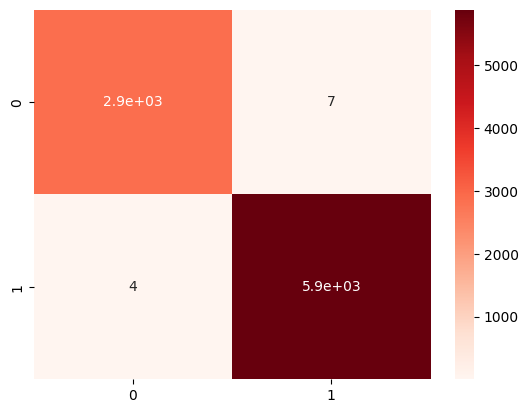

In [25]:
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth= 5, bootstrap=False)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=300, stratify=df_target)
rf.fit(X_train, y_train)
df_target_pred = rf.predict(X_test)
matrix = confusion_matrix(y_test, df_target_pred)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds)
classification_report_rf = classification_report(y_test, df_target_pred, digits=4)
print(classification_report_rf)

Random Forest Classifier Data Visualisation

[Text(0.5, 0.875, 'sector_Construction <= 0.5\ngini = 0.441\nsamples = 100.0%\nvalue = [0.328, 0.672]'),
 Text(0.25, 0.625, 'Is Global Ultimate <= 0.5\ngini = 0.481\nsamples = 64.6%\nvalue = [0.402, 0.598]'),
 Text(0.125, 0.375, 'Sales (Global Ultimate Total USD) <= 0.5\ngini = 0.126\nsamples = 27.8%\nvalue = [0.932, 0.068]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'glob_country_sg <= 0.5\ngini = 0.003\nsamples = 36.8%\nvalue = [0.002, 0.998]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Year Found <= 2016.5\ngini = 0.311\nsamples = 35.4%\nvalue = [0.193, 0.807]'),
 Text(0.625, 0.375, 'glob_country_sg <= 0.5\ngini = 0.326\nsamples = 27.0%\nvalue = [0.205, 0.795]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'glob_country_sg <= 0.5\ngini = 0.26\nsamples = 8.5%\nvalue = [0.153, 0.847]'),
 Text(0.8125, 0.125, '\n  (...)  \

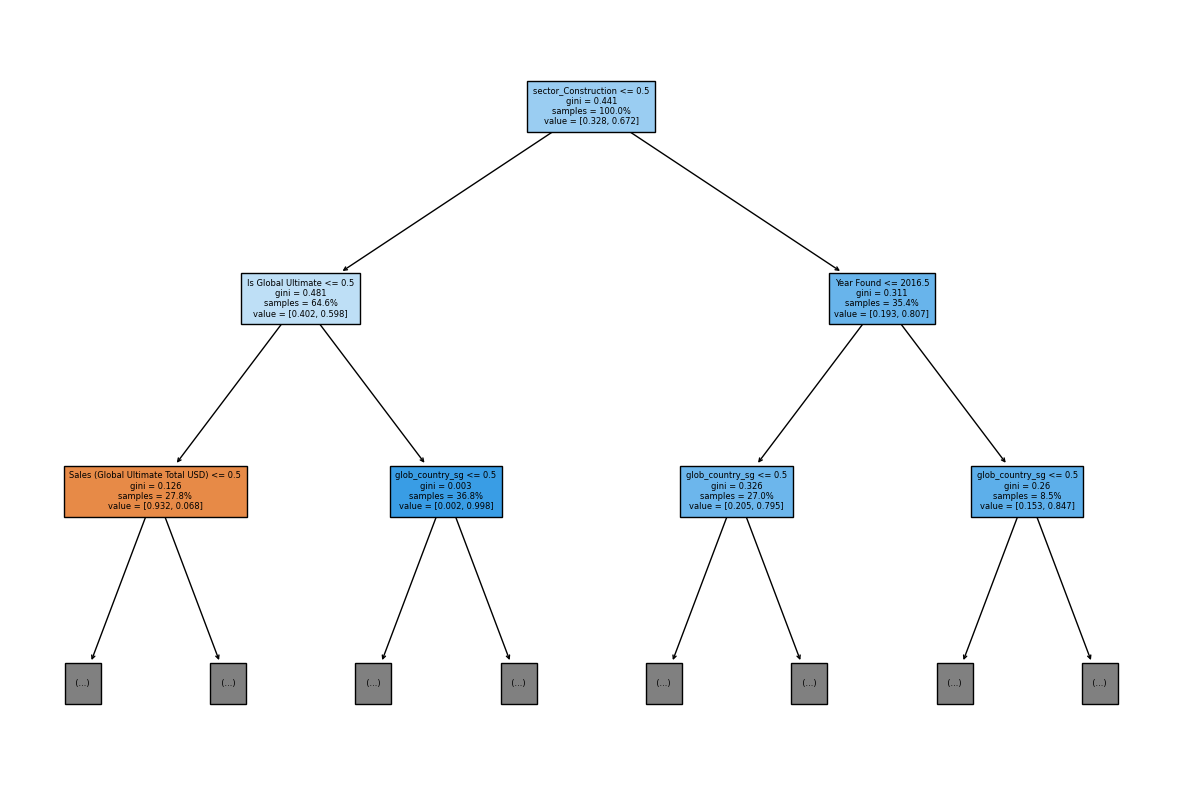

In [26]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(rf.estimators_[1],
               max_depth = 2,
               fontsize = 6,
               proportion = True,
               filled = True,
               feature_names = df.drop(columns = ['same_sales']).columns)

In [27]:
CLASS_MODEL = RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=3, max_depth= 5, bootstrap=False)
CLASS_MODEL.fit(df_features, df_target)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=150)

## Regression Model

Now that our model can predict same-sales Companies accurately, we train a regression model to predict the rest of the data.

In [28]:
df_notsame = df[df['same_sales'] == False].copy()

### Feature selection - Principle Component Analysis (PCA)

With some research, we found that we could utilise PCA to handle multivariate datasets.PCA is a flexible tool that allows analysis of datasets that may contain multicollinearity, missing values, categorical data, and imprecise measurements.The most important use of PCA was to represent a multivariate data table as smaller set of variables in order to observe trends, clusters and outliers. This may uncover various relationships between observations and variables.

First we separate features and the target variable.

In [29]:
X = df_notsame.drop(columns=['Sales (Domestic Ultimate Total USD)', 'same_sales']).values
y = df_notsame['Sales (Domestic Ultimate Total USD)'].values.ravel()

We then standardize the features, which is an important step for PCA.

In [30]:
from sklearn.preprocessing import StandardScaler

REG_SCALER = StandardScaler()
X = REG_SCALER.fit_transform(X)

To obtain the optimum number of PCA components, we plot an explained variance ratio graph.

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

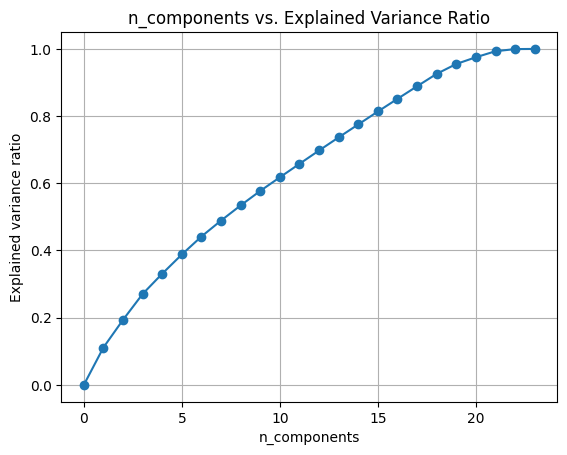

In [31]:
from sklearn.decomposition import PCA

var_ratio = []
nums = np.arange(24)
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

# plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

From the graph, we observe that the explained variance ratio tapers off at around 20 components. We thus choose 20 as our desired number of components.

In [32]:
REG_PCA = PCA(n_components=20)
X = REG_PCA.fit_transform(X)

### Ridge Regression
We chose Ridge regression as a model to try, as it is a regularization technique commonly used in machine learning to address multicollinearity and prevent overfitting of models.

In [33]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# model = Ridge(solver='saga')
# param_grid = {"alpha": [0.01, 0.1, 1, 10, 100, 1000]}
# kf = KFold(n_splits=4, shuffle=True, random_state=300)
# cv = GridSearchCV(model, param_grid, cv=kf)

# cv.fit(X, y)

# best_score = cv.best_score_
# i = np.where(cv.cv_results_.get("mean_test_score") == best_score)
# print("Best parameters:", cv.best_params_)
# print("Best Mean r^2:", best_score)
# print("Best Standard Deviation:", cv.cv_results_.get("std_test_score")[i])

Best parameters: {'alpha': 1000}

---


Best Mean r^2: 0.0.010476929608761953

---


Best Standard Deviation: [0.00328377]

###2. Gradient Boosting
We also chose to try out Gradient Boosting Regressor as a model.Being an ensemble method, Gradient Boosting combines the strengths of multiple weak learners often resulting in better performance than individual models.


In [34]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor()
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['subsample'] = [0.5, 0.7, 1.0]
# grid['max_depth'] = [3, 7, 9]
# kf = KFold(n_splits=4, shuffle=True, random_state=300)
# cv = RandomizedSearchCV(model, grid, cv=kf)

# cv.fit(X, y)

# best_score = cv.best_score_
# i = np.where(cv.cv_results_.get("mean_test_score") == best_score)
# print("Best parameters:", cv.best_params_)
# print("Best Mean r^2:", best_score)
# print("Best Standard Deviation:", cv.cv_results_.get("std_test_score")[i])

Best parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01}

---


Best Mean r^2: 0.10559735821812219

---


Best Standard Deviation: [0.12334489]

### 3. Random Forest Regressor
Finally, we also decided to implement Random Forest Regressor as a model. Random Forest Regressor tends to deliver high predictive accuracy as it is capable of capturing complex relationships and non-linear patterns in the data, making it suitable for a wide range of regression problems.

Hyperparemeter tuning for Random Forest Regressor

In [35]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_split=2, min_samples_leaf=4, bootstrap=True)
# param_grid = {'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
#               'n_estimators': [100, 300, 500]}
# kf = KFold(n_splits=3, shuffle=True, random_state=300)
# cv = RandomizedSearchCV(model, param_grid, cv=kf)

# cv.fit(X, y)

# best_score = cv.best_score_
# i = np.where(cv.cv_results_.get("mean_test_score") == best_score)
# print("Best parameters:", cv.best_params_)
# print("Best Mean r^2:", best_score)
# print("Best Standard Deviation:", cv.cv_results_.get("std_test_score")[i])

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf':2}

---


Best Mean r^2: 0.1478159225145794

---


Best Standard Deviation: [0.08727522]

In [36]:
from sklearn.ensemble import RandomForestRegressor

REG_MODEL = RandomForestRegressor(max_depth=None, max_features='sqrt', bootstrap=True, n_estimators=100, min_samples_split=5, min_samples_leaf=2)
REG_MODEL.fit(X, y)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5)

Comparing the "Best Mean r^2" and "Best Standard Deviation" scores amongst these 3 regression models :

**Best performing : Random Forest Regressor**

Best Mean r^2 Score: 0.1478159225145794

Best Standard Deviation Score: 0.08727522

## Conclusion

"In conclusion, our project managed to employ a Random Forest Classifier that yielded impressive results, showcasing the model's effectiveness in accurately classifying instances within our dataset.

On the other hand, the utilization of a Random Forest Regressor, while a powerful tool, did not yield the anticipated high scores for our regression task. Despite the challenges faced, such as the presence of outliers or specific characteristics of the data, the regressor's performance did not match the success seen with the classifier. This outcome emphasizes the importance of carefully considering the nature of the task at hand and the specific strengths and limitations of the chosen algorithm.

As we move forward, it is crucial to reflect on the valuable insights gained from both experiences. The successes of the Random Forest Classifier underscore its potential for classification tasks, while the challenges faced with the regressor prompt us to explore alternative regression approaches or fine-tune the model parameters to better suit the intricacies of our specific dataset. In the dynamic field of machine learning, every outcome serves as a learning opportunity, guiding us toward continuous improvement and refinement in our modeling strategies."


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [37]:
def testing_hidden_data(df: pd.DataFrame,
                        imp_num=IMP_NUM,
                        imp_cat=IMP_CAT,
                        class_model=CLASS_MODEL,
                        scaler=REG_SCALER,
                        pca=REG_PCA,
                        reg_model=REG_MODEL
                        ) -> list:

  df = df.drop(columns=['Square Footage',
                        'Employees (Single Site)',
                        'Import/Export Status',
                        'Fiscal Year End',
                        'Company Status (Active/Inactive)',
                        'AccountID',
                        'Company',
                        'Company Description',
                        '8-Digit SIC Description',
                        'LATITUDE',
                        'LONGITUDE'])

  df["same_ultimate_company"] = df["Global Ultimate Company"] == df["Domestic Ultimate Company"]

  df['sector'] = df['SIC Code'].apply(lambda x:
      'Agriculture, Forestry and Fishing' if x < 1000 else
      'Mining' if x < 1500 else
      'Construction' if x < 1800 else
      'not used' if x < 2000 else
      'Manufacturing' if x < 4000 else
      'Transportation, Communications, Electric, Gas and Sanitary service' if x < 5000 else
      'Wholesale Trade' if x < 5200 else
      'Retail Trade' if x < 6000 else
      'Finance, Insurance and Real Estate' if x < 6800 else
      'Services' if x < 9000 else
      'Public Administration' if x <= 9729 else
      'Nonclassifiable'
  )

  df['par_country_sg'] = df['Parent Country'] == 'Singapore'
  df['glob_country_sg'] = df['Global Ultimate Country'] == 'Singapore'
  df['same_employees'] = df['Employees (Domestic Ultimate Total)'] == df['Employees (Global Ultimate Total)']

  df = df.drop(columns=['SIC Code',
                        'Industry',
                        '8-Digit SIC Code',
                        'Parent Company',
                        'Parent Country',
                        'Global Ultimate Company',
                        'Global Ultimate Country',
                        'Domestic Ultimate Company',])

  from sklearn.impute import SimpleImputer

  df_num = df[["Year Found", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
            "Sales (Global Ultimate Total USD)"]]
  df_cat = df[["Entity Type", "Ownership Type", "sector"]]
  df.loc[:,df_num.columns] = imp_num.transform(df_num)
  df.loc[:,df_cat.columns] = imp_cat.transform(df_cat)

  df = pd.get_dummies(df, columns=["sector", "Entity Type", "Ownership Type"], drop_first=True)

  same_sales = CLASS_MODEL.predict(df.values)
  result = list(same_sales * df["Sales (Global Ultimate Total USD)"].values)
  result = [x if x else 1167843823 for x in result]

  # X = df.drop(same_sales, axis=0).values
  X = scaler.transform(df.values)
  X = pca.transform(X)
  y = reg_model.predict(X)

  result = same_sales * df["Sales (Global Ultimate Total USD)"].values
  result = result + (~same_sales * y)

  return result

##### Cell to check testing_hidden_data function

In [38]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
actual = test_df['Sales (Domestic Ultimate Total USD)'].values.ravel()
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
pred = np.array(testing_hidden_data(test_df))

from sklearn.metrics import r2_score
r2_score(actual, pred)

0.6926423938449002

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!